In [38]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
def get_data(token):
    if token in ['ETH', 'SOL','USDT','FLOW']:
        server="kraken"
    else: 
        server="coinbase-pro"
    res = requests.get(
        f'https://api.cryptowat.ch/markets/{server}/{token}usd/ohlc',
         params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-21T16',tz='US/Pacific').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [4]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT','FLOW']

In [5]:
#Total trade volumeUSD 
df_base = pd.concat(get_data(token) for token in tokens)
df_rank = df_base.groupby('token')['volumeUSD'].sum().to_frame().sort_values('volumeUSD',ascending=False)
df_rank

,volumeUSD
token,
ETH,4.233380e+09
USDT,3.629380e+09
AVAX,3.569779e+09
SOL,7.203829e+08
FLOW,8.926499e+07


In [6]:
#close price ratio
df_base['ETH/SOL'] = (df_base[df_base['token']=='ETH']['close']/ df_base[df_base['token']=='SOL']['close']).to_frame()

In [7]:
#rename columns.
df_base.rename(columns={"volume":"volumeBase","volumeUSD":"volumeTerm"})

,ts,open,high,low,close,volumeBase,volumeTerm,token,ETH/SOL
0,2021-11-22 00:00:00,4316.410,4339.250,4250.000,4263.510,2275.049242,9.768715e+06,ETH,18.501606
1,2021-11-22 01:00:00,4265.390,4269.980,4210.000,4234.280,5177.368685,2.191977e+07,ETH,18.728294
2,2021-11-22 02:00:00,4234.280,4244.140,4173.000,4217.000,2137.011937,8.986250e+06,ETH,18.564825
3,2021-11-22 03:00:00,4218.090,4219.480,4163.640,4191.830,1377.294702,5.782201e+06,ETH,18.785650
4,2021-11-22 04:00:00,4191.820,4211.210,4130.430,4166.580,1762.426504,7.340491e+06,ETH,18.876365
5,2021-11-22 05:00:00,4167.460,4185.670,4153.730,4156.310,537.360236,2.239876e+06,ETH,19.105958
6,2021-11-22 06:00:00,4158.600,4185.800,4130.010,4185.560,2311.117694,9.641665e+06,ETH,18.838599
7,2021-11-22 07:00:00,4185.570,4187.550,4166.450,4181.880,465.177916,1.944760e+06,ETH,19.085756
8,2021-11-22 08:00:00,4181.010,4221.680,4181.010,4191.770,552.511246,2.322007e+06,ETH,19.366892
9,2021-11-22 09:00:00,4191.760,4213.260,4189.990,4202.810,541.428780,2.271020e+06,ETH,19.420591


In [8]:
#close price for each token in columns
df1 = df_base[df_base["token"]=="ETH"][["ts","close"]].rename(columns={"close":"ETH"}).join(df_base[df_base["token"]=="SOL"][["close"]].rename(columns={"close":"SOL"}),how='inner')
                         
df2 = df1.join(df_base[df_base["token"]=="AVAX"][["close"]].rename(columns={"close":"AVAX"}))
df3 = df2.join(df_base[df_base["token"]=="USDT"][["close"]].rename(columns={"close":"USDT"}))
df4 = df3.join(df_base[df_base["token"]=="FLOW"][["close"]].rename(columns={"close":"FLOW"}))

df4.set_index('ts')


,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,4263.51,230.44,128.67,1.0009,14.150
2021-11-22 01:00:00,4234.28,226.09,134.85,1.0010,13.621
2021-11-22 02:00:00,4217.00,227.15,132.54,1.0009,13.753
2021-11-22 03:00:00,4191.83,223.14,133.38,1.0009,13.652
2021-11-22 04:00:00,4166.58,220.73,136.29,1.0009,13.581
2021-11-22 05:00:00,4156.31,217.54,132.02,1.0008,13.392
2021-11-22 06:00:00,4185.56,222.18,134.93,1.0007,13.548
2021-11-22 07:00:00,4181.88,219.11,135.29,1.0008,13.444
2021-11-22 08:00:00,4191.77,216.44,131.98,1.0008,14.596


In [9]:
#log return calculation
df_log = df4[['ETH','SOL','AVAX','USDT','FLOW']].apply(lambda x:np.log(x.shift(1)/x),axis=0)
df_log

,ETH,SOL,AVAX,USDT,FLOW
0,NaN,NaN,NaN,NaN,NaN
1,0.006879,0.019057,-0.046912,-0.0001,0.038102
2,0.004089,-0.004677,0.017279,0.0001,-0.009644
3,0.005987,0.017811,-0.006318,0.0000,0.007371
4,0.006042,0.010859,-0.021583,0.0000,0.005214
5,0.002468,0.014557,0.031832,0.0001,0.014014
6,-0.007013,-0.021105,-0.021803,0.0001,-0.011581
7,0.000880,0.013914,-0.002664,-0.0001,0.007706
8,-0.002362,0.012261,0.024770,0.0000,-0.082215
9,-0.002630,0.000139,-0.022254,0.0000,0.007013


In [10]:
#log retun correlations
df_logcorr = df_log.corr()
df_logcorr

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.743785,0.637368,-0.029972,0.572974
SOL,0.743785,1.000000,0.624808,0.064054,0.472480
AVAX,0.637368,0.624808,1.000000,0.020333,0.391059
USDT,-0.029972,0.064054,0.020333,1.000000,-0.143524
FLOW,0.572974,0.472480,0.391059,-0.143524,1.000000


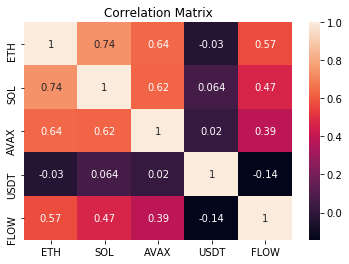

In [42]:
#visualization.
sn.heatmap(df_logcorr, annot=True)
plt.title("Correlation Matrix")
plt.show()